In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [247]:
print("Pandas  : ", pd.__version__)
print("NumPy : ", np.__version__)

Pandas  :  1.3.4
NumPy :  1.21.2


### Fetch Dataset from Kaggle
- Import data from Kaggle
- Use <a href="https://www.kaggle.com/c/titanic/data" target="_blank"> this Link </a>  

In [248]:
# Path of the file to read
filepath = "datasets/titanic_train.csv"

# Read the file into a variable fifa_data
train = pd.read_csv(filepath, parse_dates=True)

In [249]:
# Print the first 5 rows of the data
train.shape

(891, 12)

In [250]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [251]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [252]:
train.sort_values(by=['Age']).dropna(axis="index", subset=['Age', 'Fare']).reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
1,755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
2,644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
3,469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
4,78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q
710,493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C
711,96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C
712,851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S


titanic["Age"].mean()  
titanic[["Age", "Fare"]].median()  
titanic[["Age", "Fare"]].describe()  

What is the average age for male versus female Titanic passengers?  

titanic[["Sex", "Age"]].groupby("Sex").mean()  
titanic.groupby("Sex").mean()  
titanic.groupby("Sex")["Age"].mean()  

What is the mean ticket fare price for each of the sex and cabin class combinations?  

titanic.groupby(["Sex", "Pclass"])["Fare"].mean()  

What is the number of passengers in each of the cabin classes?  

titanic["Pclass"].value_counts()  

I’m interested in the Titanic passengers from cabin class 2 and 3.  
class_23 = titanic[titanic["Pclass"].isin([2, 3])]  

class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]  

age_no_na = titanic[titanic["Age"].notna()]  

I’m interested in the names of the passengers older than 35 years.  
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]  

I’m interested in rows 10 till 25 and columns 3 to 5.  
titanic.iloc[9:25, 2:5]  

For example, to assign the name anonymous to the first 3 elements of the third column:  
titanic.iloc[0:3, 3] = "anonymous"  

<AxesSubplot:>

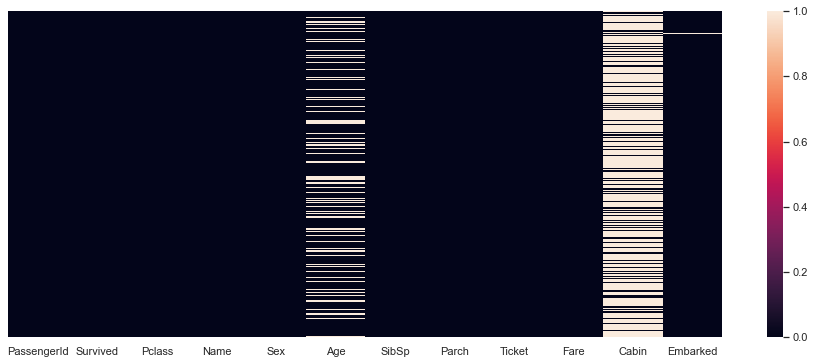

In [253]:
# plt.figure(figsize=[16, 6])
sns.set(rc = {'figure.figsize':(16,6)})
sns.heatmap(train.isnull(), yticklabels=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

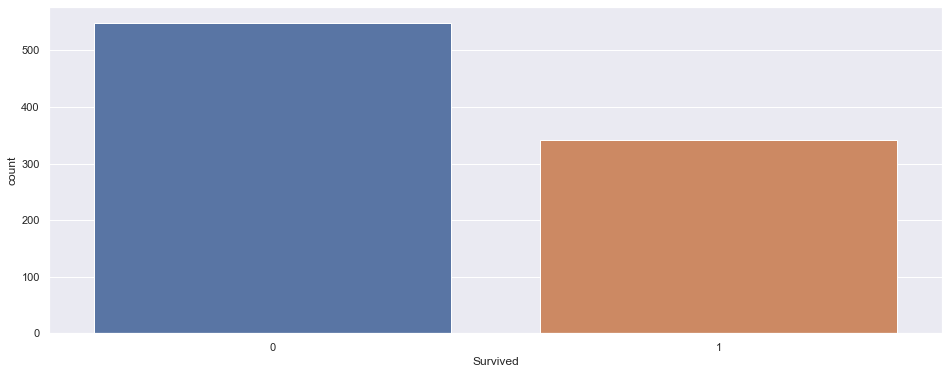

In [254]:
sns.countplot(x='Survived', data=train)

In [255]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

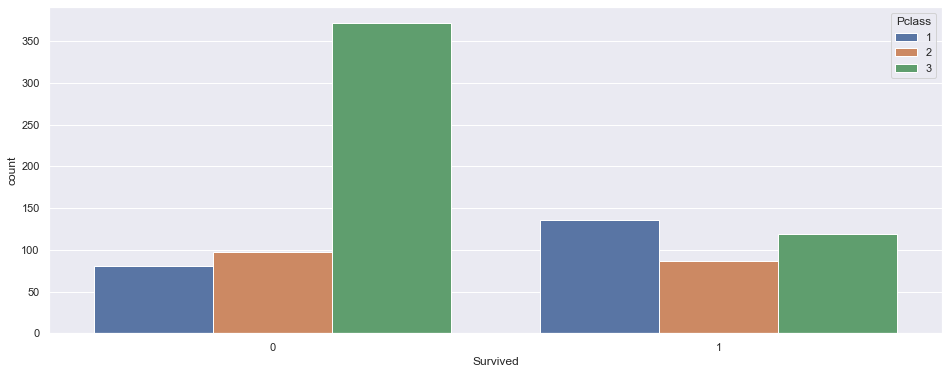

In [256]:
# sns.countplot(x="Survived", hue="Sex", data=train)
sns.countplot(x="Survived", hue="Pclass", data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

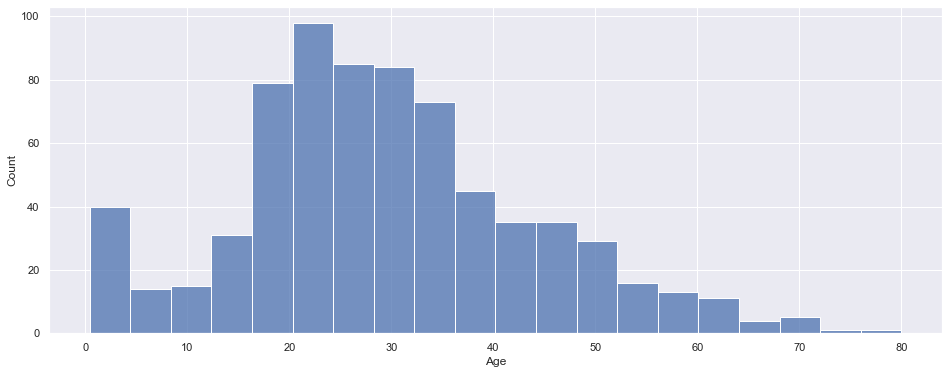

In [257]:
sns.histplot(train['Age'], bins=20)

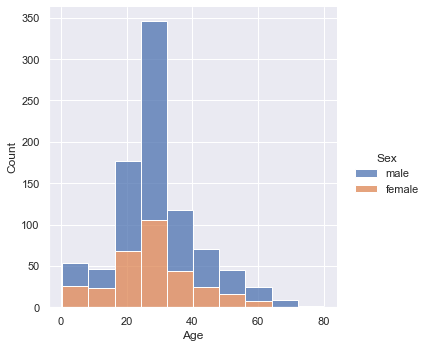

In [275]:
sns.displot(train, x='Age', hue='Sex', multiple='stack', bins=10)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

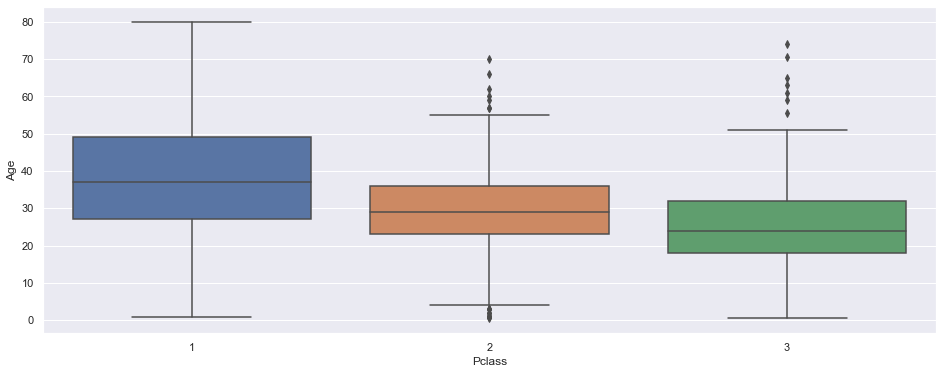

In [259]:
sns.boxplot(x="Pclass", y="Age", data=train)

## Filling the NaN Values

In [260]:
train['Age'].mean()

29.69911764705882

In [261]:
train['Age'].isna().sum()

177

In [262]:
train['Age'].fillna(value=train['Age'].mean(), inplace=True)

In [263]:
train['Age'].isna().sum()

0

In [264]:
train[(train['Pclass'])==1]['Age'].mean()

37.04811819172113

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

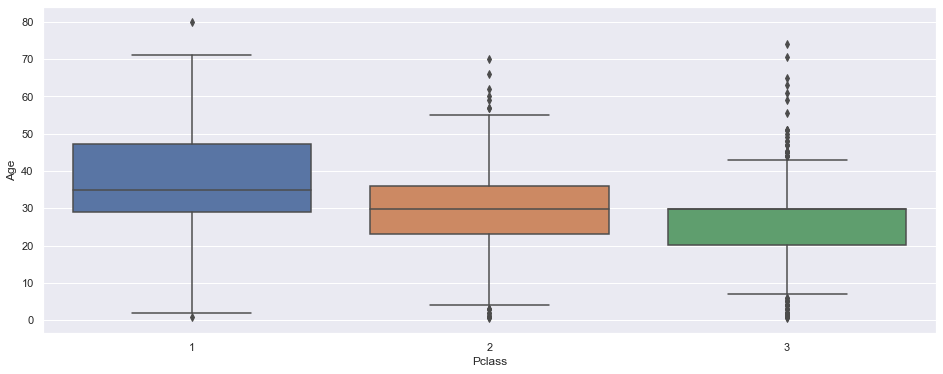

In [265]:
sns.boxplot(x="Pclass", y="Age", data=train)

<AxesSubplot:>

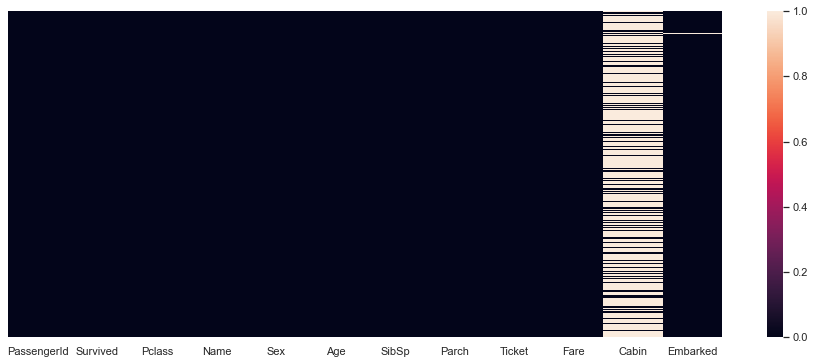

In [266]:
sns.heatmap(train.isnull(), yticklabels=False)

In [267]:
train.drop(['Cabin', 'Embarked'], axis=1, inplace=True)

In [268]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000


<AxesSubplot:>

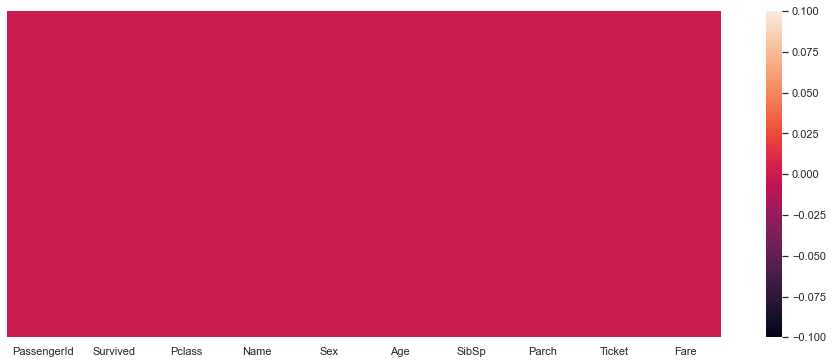

In [269]:
sns.heatmap(train.isnull(), yticklabels=False)

## Matplotlip